In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dropout

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
xtrain=xtrain/255
xtest=xtest/255

In [5]:
ytrain=ytrain.flatten()
ytest=ytest.flatten()

In [6]:
ytrain[0]

6

In [7]:
xtest.shape

(10000, 32, 32, 3)

In [8]:
ytest.shape

(10000,)

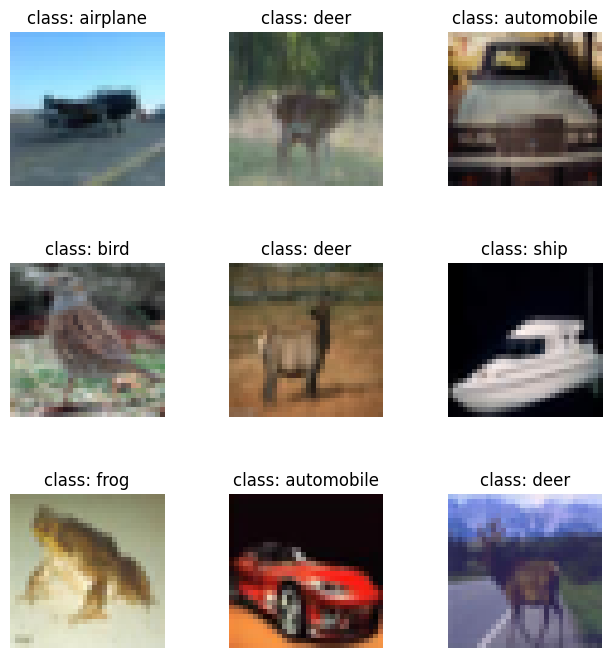

In [30]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(8,8))
axes=axes.ravel()
selected_indicates=np.random.randint(0,len(xtrain),size=9)
for  i in range(9):
  index=selected_indicates[i]
  img=xtrain[index]
  label=class_names[ytrain[index]]
  axes[i].imshow(img)
  axes[i].axis("off")
  axes[i].set_title(f"class: {label}")
plt.subplots_adjust(hspace=0.5)
plt.show()

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add((Conv2D(64,(3,3),activation="relu")))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())


model.add(Dense(64,activation="relu"))

model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 6, 6, 64)         

In [13]:
history=model.fit(xtrain,ytrain,epochs=60,batch_size=16, validation_split=0.2)

Epoch 1/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.2719 - loss: 1.9441 - val_accuracy: 0.5015 - val_loss: 1.3861
Epoch 2/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 73s 15ms/step - accuracy: 0.4834 - loss: 1.4270 - val_accuracy: 0.5660 - val_loss: 1.2104
Epoch 3/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.5336 - loss: 1.2925 - val_accuracy: 0.6175 - val_loss: 1.1046
Epoch 4/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.5780 - loss: 1.1915 - val_accuracy: 0.6401 - val_loss: 1.0374
Epoch 5/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6034 - loss: 1.1191 - val_accuracy: 0.6518 - val_loss: 0.9933
Epoch 6/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6233 - loss: 1.0764 - val_accuracy: 0.6745 - val_loss: 0.9334
Epoch 7/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6414 - loss: 1.0185 - val_accuracy: 0.6677 - val_loss: 0.9457
Epoch 8/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.6483 -

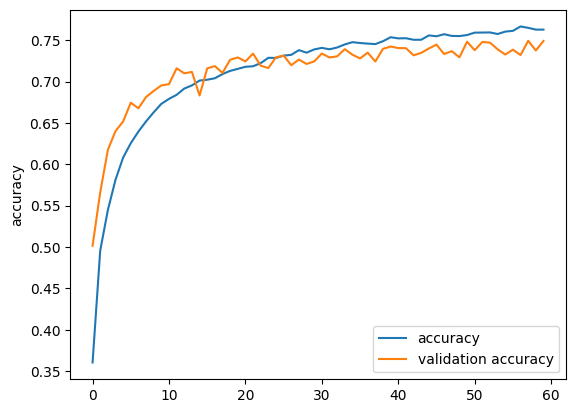

In [14]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.xlabel=("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

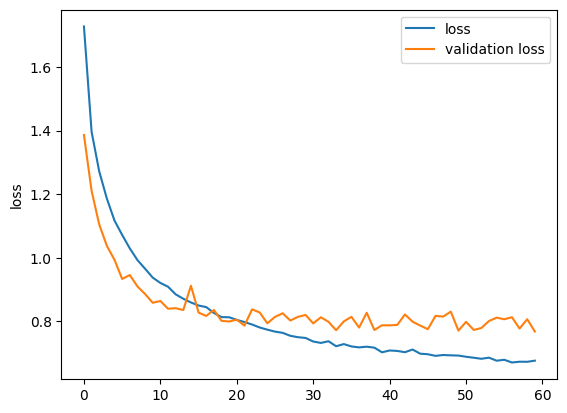

In [15]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.xlabel=("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [18]:
test_images=[]
test_images.append(load_img("image1.jpg",target_size=(32,32)))
test_images.append(load_img("image2.jpg",target_size=(32,32)))
test_images=np.array([img_to_array(img) for img in test_images])
test_images=test_images/255

In [19]:
results=model.predict(test_images)
for result in results:
  print("predicted class:",class_names[np.argmax(result)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
predicted class: truck
predicted class: dog


In [20]:
predicted_classes = [class_names[np.argmax(result)] for result in results]

In [21]:
predicted_classes

['truck', 'dog']

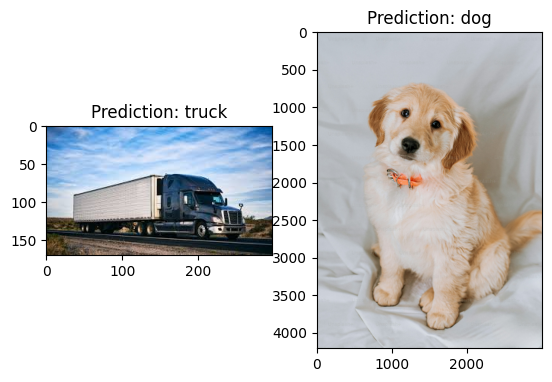

In [22]:
predicted_classes = [class_names[np.argmax(result)] for result in results]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(load_img("image1.jpg"))
ax[0].set_title(f"Prediction: {predicted_classes[0]}")
ax[1].imshow(load_img("image2.jpg"))
ax[1].set_title(f"Prediction: {predicted_classes[1]}")

plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(ytest, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


TypeError: 'str' object is not callable

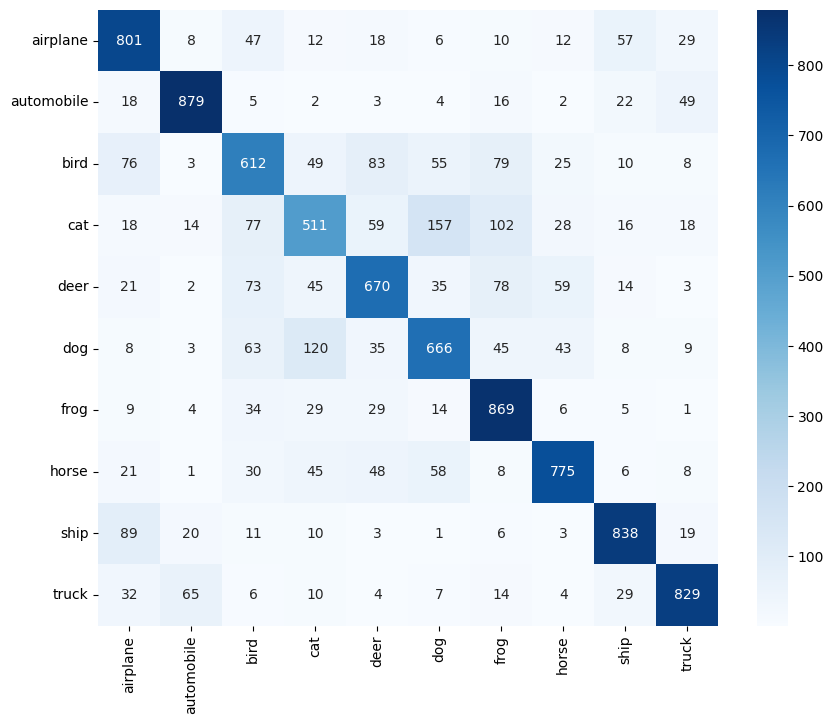

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted class')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("lastversion.keras")